**Luis Carlos Figueroa Benitez**

**Cristian Alexis Díaz Rodríguez**

En este notebook se hace uso de los predictores de la libreria Sktime para predecir el precio de las criptomonedas o acciones. Se hace una parte de forecasting puro, osea, prediccion con los algoritmos que se considera, ofrecen resultados mas acordes a lo esperado. Estos algoritmos, se escojen basados en una segunda parte en la que se implementan varios de estos y se evalua el error.

In [1]:
!pip install cryptocmd
!pip install yfinance

     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 6.4 MB 17.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install sktime[all_extras]

     |████████████████████████████████| 6.6 MB 25.4 MB/s 
     |████████████████████████████████| 3.3 MB 40.0 MB/s 
     |████████████████████████████████| 9.8 MB 42.2 MB/s 
     |████████████████████████████████| 136 kB 45.8 MB/s 
     |████████████████████████████████| 43 kB 568 kB/s 
     |████████████████████████████████| 116 kB 45.6 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 580 kB 42.2 MB/s 
     |████████████████████████████████| 788 kB 41.4 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4 MB 44.9 MB/s 
     |████████████████████████████████| 11.2 MB 45.8 MB/s 
     |████████████████████████████████| 793 kB 43.1 MB/s 
     |████████████████████████████████| 6.9 MB 46.5 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |█████

# Forecast puro

**Correr la siguiente linea si salen errores de matplotlib**

In [3]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 21.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


                Close
Date                 
2019-03-14   6.526642
2019-03-15   7.504351
2019-03-16   7.383882
2019-03-17   4.776164
2019-03-18   5.110341
...               ...
2022-04-08  26.872951
2022-04-09  27.279665
2022-04-10  26.590843
2022-04-11  23.785769
2022-04-12  24.645936

[1126 rows x 1 columns]
2019-03-16 00:00:00
2019-03-16 00:00:00
DatetimeIndex(['2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15',
               '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19',
               '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23',
               '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01',
               '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
               '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12'],
              dtype='datetime64[ns]', freq=None)


/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

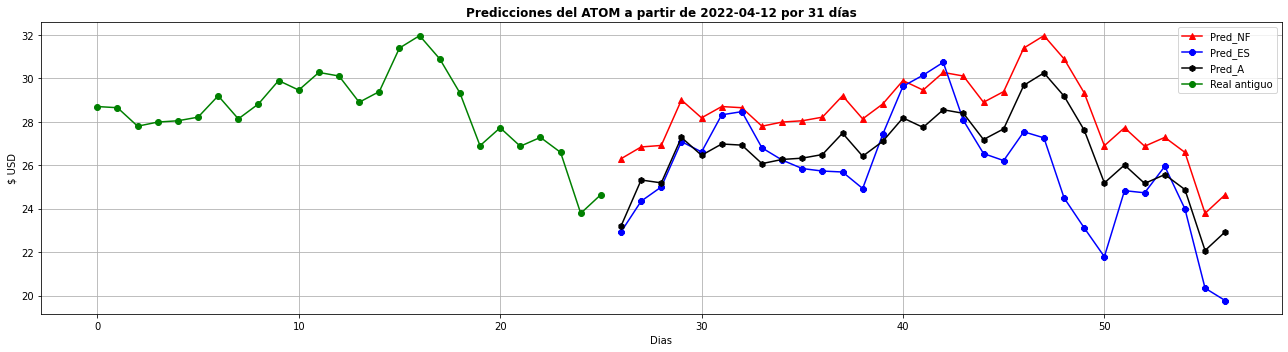

In [15]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA

from cryptocmd import CmcScraper

ticker = 'ATOM'
datePredstart = '01-01-2014'  # '01-01-2014' '31-03-2022' 
datePredend = '12-04-2022' # FECHA A PARTIR DE LA QUE SE QUIERA PREDECIR

scraper = CmcScraper(ticker, datePredstart, datePredend ,order_ascending= True) 
data = scraper.get_dataframe()


data = data.set_index(data["Date"])   # pd.DatetimeIndex(sales["date"].asfreq(freq='D'))

data = data.asfreq(freq='D')


df = data[['Close']] 

#print(df)
#print(df.index[2])

df = df.squeeze()


y = df
#print(y.index[2])

nPred_days = 31

datePredend = datetime.datetime.strptime(datePredend,"%d-%m-%Y")
fh = pd.date_range(datePredend, periods=nPred_days, freq="D")

# For this example, we choose the naive forecasting method of predicting the last seen value. 
forecaster = NaiveForecaster(strategy="last",sp=30)

forecaster.fit(y)
y_pred = forecaster.predict(fh)

# Revisar que si quedaron bien las fechas de y_pred con las y_test finales
print(y_pred.index)


# Exponential Smoothing
forecasterES = ExponentialSmoothing(trend="mul", seasonal="additive", sp=30, smoothing_seasonal=0.9)
forecasterES.fit(y)
y_predES = forecasterES.predict(fh)

# Arima
forecasterA = ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 0, 30), suppress_warnings=True)
forecasterA.fit(y)
y_predA = forecasterA.predict(fh)


# plotting predictions and past data
y_prednp = y_pred.to_numpy()
y_predESnp = y_predES.to_numpy()
y_predAnp = y_predA.to_numpy()
y_testnp = y.to_numpy()

fig, axes = plt.subplots(1, 1, figsize=(18, 5))
#y_testnp = y_testnp[2100:]
daysFC = np.arange(y_testnp.size, y_testnp.size + nPred_days)

# esto es para una mejor visualizacion si el data set es grande
daysFC = daysFC-1100
axes.plot(daysFC,y_prednp ,color="r", label="Pred_NF", marker= "^")
axes.plot(daysFC,y_predESnp ,color="b", label="Pred_ES", marker= "8")
axes.plot(daysFC,y_predAnp ,color="k", label="Pred_A", marker= "h")
axes.plot(y_testnp[1100:], color="green", label="Real antiguo", marker= "o")

axes.legend()
plt.xlabel("Dias")
plt.ylabel("$ USD")

tittle = "Predicciones del " + str(ticker) + " a partir de " + str(y_pred.index[0].date()) + " por " + str(nPred_days) + " días"
axes.set_title(tittle, fontsize=12, fontweight="bold")

plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
datePredend = '08-04-2022'
datePredend = datetime.datetime.strptime(datePredend,"%d-%m-%Y")
print(datePredend.day)
print(datePredend.month)
print(datePredend.year)


8
4
2022


# Varios Metodos Forecast con medicion de error

In [10]:
# Librerias
import pandas as pd
import numpy as np
import datetime
from ipywidgets import interact
import matplotlib.pyplot as plt

from cryptocmd import CmcScraper
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [11]:
@interact(ticker=["ADA","OSMO","BTC","ETH","ATOM","JUNO","LUNA","SHIB","TSLA", "AAPL","FB"],year_start = (2014,2022,1),month_start = (1,12,1),day_start = (1,31,1),year_end = (2014,2022,1),month_end = (1,12,1),day_end = (1,31,1))
def CryptoPrediction(ticker,year_start,month_start,day_start,year_end,month_end,day_end):

  # Paso 1: Base de datos

  ticker = ticker
  datePredstart = str(day_start) + "-" + str(month_start) + "-" + str(year_start) # '01-01-2014' '31-03-2022' 
  datePredend = str(day_end) + "-" + str(month_end) + "-" + str(year_end)
  scraper = CmcScraper(ticker, datePredstart, datePredend ,order_ascending= True) 
  data = scraper.get_dataframe()

  # Se organizan los datos en el formato adecuado: Fecha como indice y frecuencia dias
  data = data.set_index(data["Date"]) 
  data = data.asfreq(freq='D')
  # El valor objetivo que se va a predecir será el valor del precio de las acciones de "Cierre".
  df = data[['Close']] 

  # Paso 2: Se dividen los datos, entrenamiento y test son los que van a servir de comparacion con los que se predigan

  # cantidad de dias a predecir
  nPred_days = 30
  y = df
  y_train, y_test = temporal_train_test_split(y, test_size=nPred_days)
  
  # Paso 3: Se configura el FH que contiene las fechas que se predeciran, se usan los diferentes forecast para predecir 

  fh = ForecastingHorizon(y_test.index, is_relative=False)

  # Naive Forecaster
  forecaster = NaiveForecaster(strategy="last", sp= 30)
  forecaster.fit(y_train)
  y_pred = forecaster.predict(fh)

  # Exponential Smoothing
  forecasterES = ExponentialSmoothing(trend="mul", seasonal="additive", sp=31)
  forecasterES.fit(y_train)
  y_predES = forecasterES.predict(fh)

  # Arima
  forecasterA = ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 0, 31), suppress_warnings=True)
  forecasterA.fit(y_train)
  y_predA = forecasterA.predict(fh)

  # BATS
  forecasterBATS = BATS(sp=30, use_trend=True, use_box_cox=False)
  forecasterBATS.fit(y_train)
  y_predBATS = forecasterBATS.predict(fh)

  # TBATS
  forecasterTBATS = TBATS(sp=30, use_trend=True, use_box_cox=False)
  forecasterTBATS.fit(y_train)
  y_predTBATS = forecasterTBATS.predict(fh)

  # Prophet FB
  # Convert index to pd.DatetimeIndex
  z_train, z_test = temporal_train_test_split(y, test_size=nPred_days)
  forecasterFB = Prophet(
      seasonality_mode="additive",
      n_changepoints=int(len(y_train) / 30),
      yearly_seasonality=False,
      weekly_seasonality=False,
      daily_seasonality=True,
  )

  forecasterFB.fit(z_train)
  y_predFB = forecasterFB.predict(fh.to_relative(cutoff=y_train.index[-1]))
  y_predFB.index = y_test.index

  # Stats Forecast Autoarima
  forecasterSFA = StatsForecastAutoARIMA(sp=12)
  forecasterSFA.fit(y_train)
  y_predSFA = forecasterSFA.predict(fh)

  # Paso 4: MAPE

  aux_mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
  aux_mapeES = mean_absolute_percentage_error(y_test, y_predES, symmetric=False)
  aux_mapeA = mean_absolute_percentage_error(y_test, y_predA, symmetric=False)
  aux_mapeBATS = mean_absolute_percentage_error(y_test, y_predBATS, symmetric=False)
  aux_mapeTBATS = mean_absolute_percentage_error(y_test, y_predTBATS, symmetric=False)
  aux_mapeSFA = mean_absolute_percentage_error(y_test, y_predSFA, symmetric=False)
  aux_mapeFB = mean_absolute_percentage_error(y_test, y_predFB, symmetric=False)


  # Paso 5: Graficar e imprimir error

  y_testnp = y_test.to_numpy()
  y_prednp = y_pred.to_numpy()
  y_predESnp = y_predES.to_numpy()
  y_predAnp = y_predA.to_numpy()
  y_predBATSnp = y_predBATS.to_numpy()
  y_predTBATSnp = y_predTBATS.to_numpy()
  y_predSFAnp = y_predSFA.to_numpy()
  y_predFBnp = y_predFB.to_numpy()


  fig, axes = plt.subplots(1, 1, figsize=(11, 5))
    
  axes.plot(y_prednp, color="r", label="Pred_NF", marker= "^")
  axes.plot(y_predESnp, color="y", label="Pred_ES", marker= "*")    
  axes.plot(y_predAnp, color="b", label="Pred_A", marker= "1")    
  axes.plot(y_predBATSnp, color="m", label="Pred_BATS", marker= "s")    
  axes.plot(y_predTBATSnp, color="k", label="Pred_TBATS", marker= "8")    
  axes.plot(y_predSFAnp, color="c", label="Pred_SFA", marker= "h")    
  axes.plot(y_predFBnp, color="g", label="Pred_Pr", marker= "d")    
  axes.plot(y_testnp, color="green", label="Real", marker= "o", linewidth = 3)

  axes.legend()
  plt.xlabel("Dias")
  plt.ylabel("$ USD")
  best = min(aux_mape,aux_mapeES,aux_mapeA,aux_mapeBATS,aux_mapeTBATS,aux_mapeSFA,aux_mapeFB)
  tittle = "Predicciones del " + str(ticker) + " a partir de " + str(y_pred.index[0].date()) + " por " + str(nPred_days) + " días" + ", min Error = " + str(best*100) + "%"
  axes.set_title(tittle, fontsize=12, fontweight="bold")

  plt.tight_layout()
  plt.grid()
  plt.show()


  print("NF = NaiveForecaster, ES = Exponential Smoothing, A = Arima, SFA = Stats Forecast Autoarima, Pr = Prophet (FB)")  

  print("\n")
  print("=======================================")
  print("Error(NF): ", aux_mape*100, "%")  
  print("Error(ES): ",aux_mapeES*100, "%")
  print("Error(Arima): ",aux_mapeA*100, "%")
  print("Error(BATS): ",aux_mapeBATS*100, "%")
  print("Error(TBATS): ",aux_mapeTBATS*100, "%")
  print("Error(SFA): ",aux_mapeSFA*100, "%")
  print("Error(FB): ",aux_mapeFB*100, "%")
  print("=======================================")
  print("\n")

interactive(children=(Dropdown(description='ticker', options=('ADA', 'OSMO', 'BTC', 'ETH', 'ATOM', 'JUNO', 'LU…